In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pickle
import os
import json
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
from IPython import display
import sys

In [3]:
# Import litdata from parent
sys.path.append('../')
from litdata.writer import LITWriter
from litdata.litdata import LITDataset

In [4]:
classdict = {
    'n02086240': (0, 'Shih-Zu'),
    'n02087394': (1, 'Rhodesian_ridgeback'),
    'n02088364': (2, 'Beagle'),
    'n02089973': (3, 'English_foxhound'),
    'n02093754': (4, 'Border_terrier'),
    'n02096294': (5, 'Australian_terrier'),
    'n02099601': (6, 'Golden_retriever'),
    'n02105641': (7, 'Old_English_sheepdog'),
    'n02111889': (8, 'Samoyed'),
    'n02115641': (9, 'Dingo'),
}

In [5]:
# Get root folders
from localpaths import (
    IMAGEWOOF_TRAIN_PATH, IMAGEWOOF_VAL_PATH, LITDATAPATH
)

In [6]:
# List files in train + val
trainfiles = [
    os.path.join(r,f) for (r,d,files) in os.walk(IMAGEWOOF_TRAIN_PATH) 
    for f in files if os.path.splitext(f)[-1].lower() == '.jpeg'
]
valfiles = [
    os.path.join(r,f) for (r,d,files) in os.walk(IMAGEWOOF_VAL_PATH) 
    for f in files if os.path.splitext(f)[-1].lower() == '.jpeg'
]


In [7]:
# Define additional metadata
additional_metadata = {
    'website': 'https://github.com/fastai/imagenette',
    'num_classes': 10,
    'synsets': {
        'n02086240': (0, 'Shih-Zu'),
        'n02087394': (1, 'Rhodesian_ridgeback'),
        'n02088364': (2, 'Beagle'),
        'n02089973': (3, 'English_foxhound'),
        'n02093754': (4, 'Border_terrier'),
        'n02096294': (5, 'Australian_terrier'),
        'n02099601': (6, 'Golden_retriever'),
        'n02105641': (7, 'Old_English_sheepdog'),
        'n02111889': (8, 'Samoyed'),
        'n02115641': (9, 'Dingo'),
    }
}

In [8]:
# Construct a helper function for making the object dict
def get_objdict(fname):
    fsplit = fname.split('/')
    img_ = Image.open(fname)
    cls_, name_ = classdict[fsplit[-2]]
    key, ext = os.path.splitext(fsplit[-1])
    return {
        '__key__': key,
        'jpg': img_, # Image as PIL object
        'cls': cls_, # Select only the index
    }

3


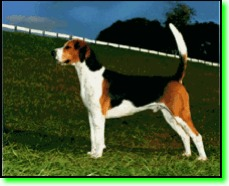

In [9]:
# Test that trainfiles works
for fname in trainfiles:
    objdict = get_objdict(fname)
    break

print(objdict['cls'])
objdict['jpg']

3


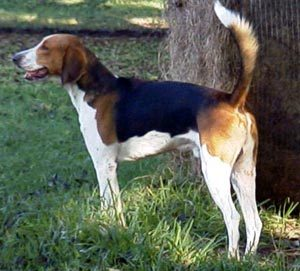

In [10]:
# Test that valfiles works
for fname in valfiles:
    objdict = get_objdict(fname)
    break

print(objdict['cls'])
objdict['jpg']

In [13]:
with LITWriter(
    'ImageWoof', 
    LITDATAPATH, 
    additional_metadata=additional_metadata,
    groupname = 'DSB@UiO',
    shard_maxfiles = 5000,
) as litwriter:
    for i, fname in enumerate(trainfiles):
        objdict = get_objdict(fname)
        litwriter.train.write(objdict)
        if i % 250 == 0:
            display.clear_output(wait=True)
            print(f'train: {i:12d}/{len(trainfiles):12d}')
            print(litwriter.train)
            

    for i, fname in enumerate(valfiles):
        objdict = get_objdict(fname)
        litwriter.val.write(objdict)
        if i % 250 == 0:
            display.clear_output(wait=True)
            print(f'val:   {i:12d}/{len(valfiles):12d}')
            print(litwriter.val)


val:           3750/        3929
ShardWriter(
	Current Shard: /work2/litdata/ImageWoof/val_0000.tar
	Current Shard Size: 0.15 GB
	Current Shard File Count: 3751
	Total File Count: 3751
)


In [14]:
dataset = LITDataset('ImageWoof', LITDATAPATH)

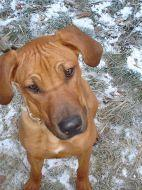

In [16]:
dataset[3244][0]